In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Placement Dataset.csv')
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
print("Number of duplicate values in the dataset is : ", dataset.duplicated().sum())

Number of duplicate values in the dataset is :  0


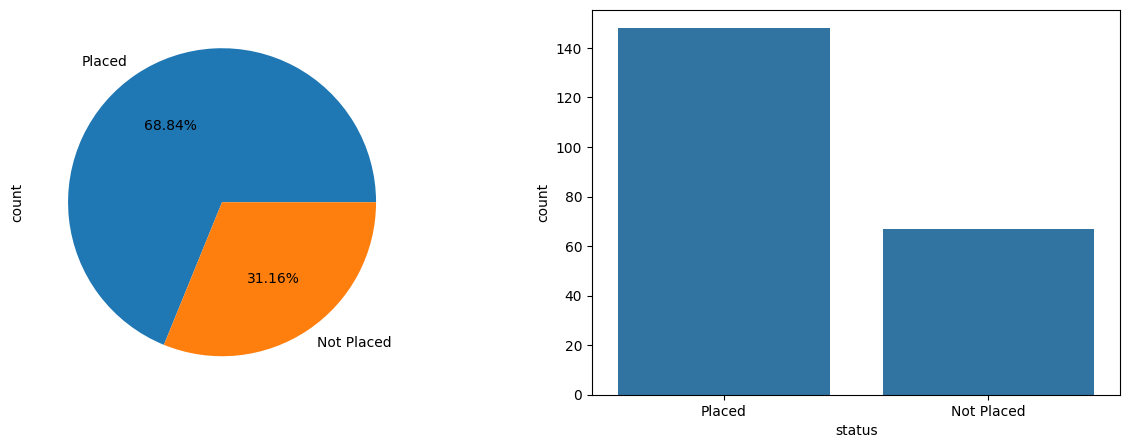

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
dataset['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'status', data = dataset)
plt.show()

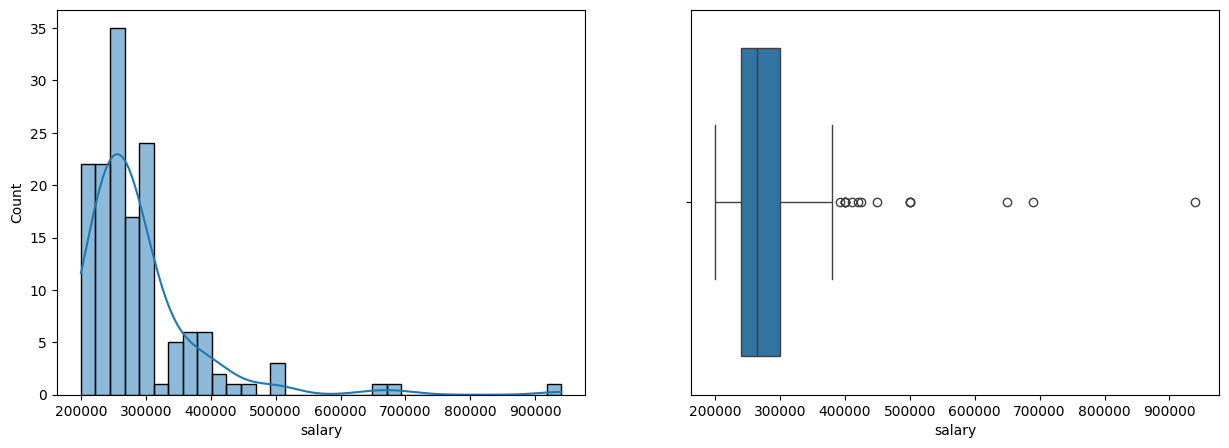

In [7]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(x = dataset.dropna()['salary'], kde = True)
plt.subplot(1,2,2)
sns.boxplot(x = dataset.dropna()['salary'])
plt.show()

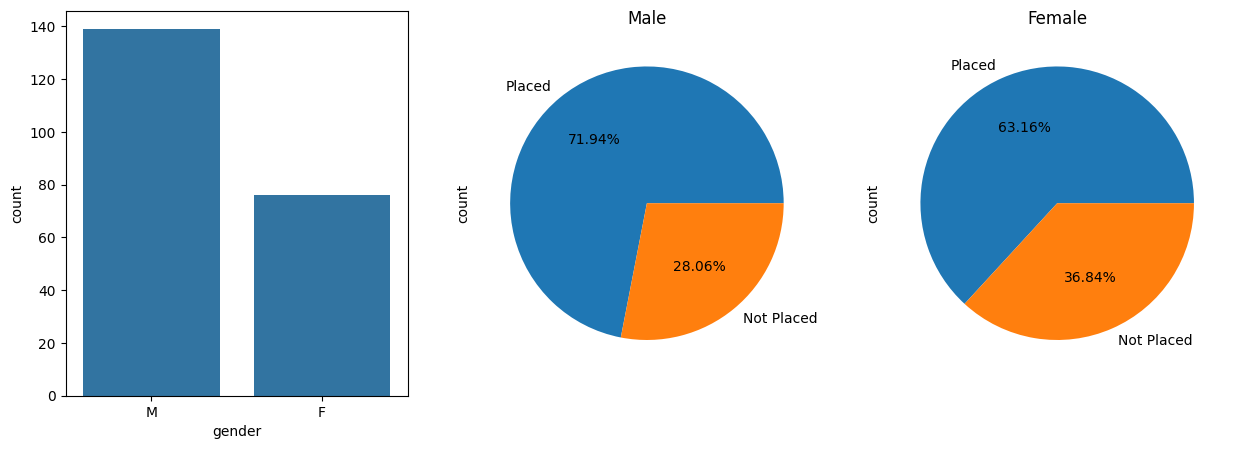

In [8]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(x = 'gender', data = dataset)
plt.subplot(1,3,2)
dataset.query('gender == "M"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Male')
plt.subplot(1,3,3)
dataset.query('gender == "F"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Female')
plt.show()

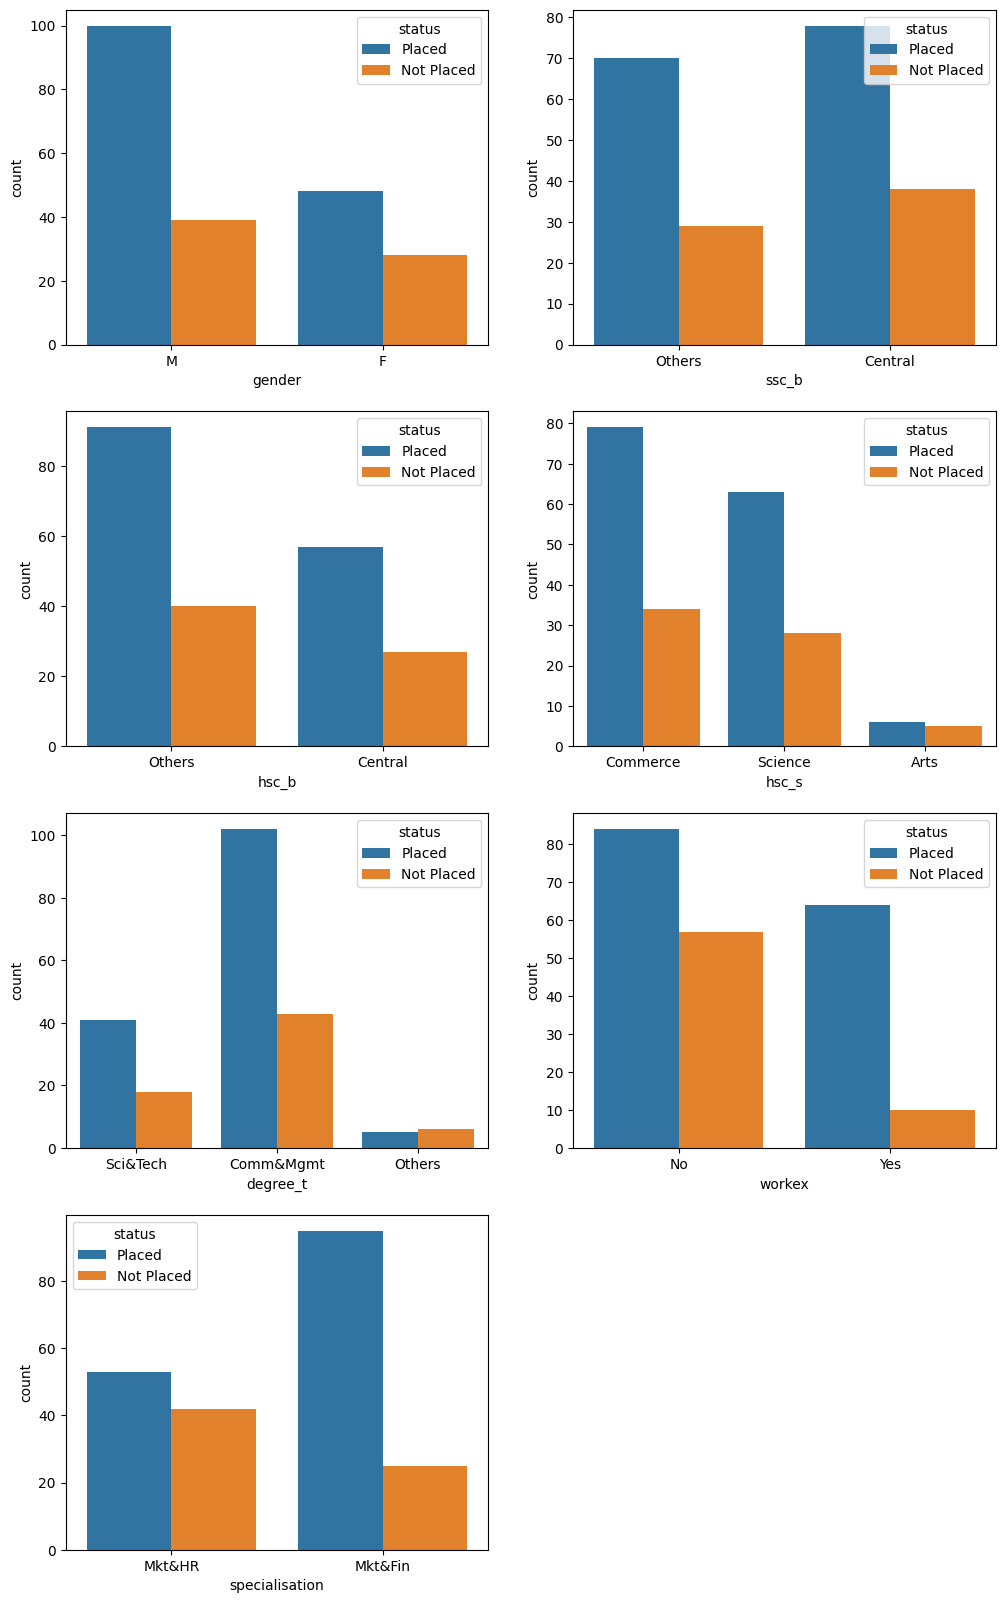

In [9]:
plt.figure(figsize = (12,20))
for i,col in enumerate(dataset.drop(['status'], axis =1).select_dtypes('object').columns):
    plt.subplot(4,2,i+1)
    sns.countplot(x = col, hue = 'status', data = dataset)
plt.show()

#Histogram

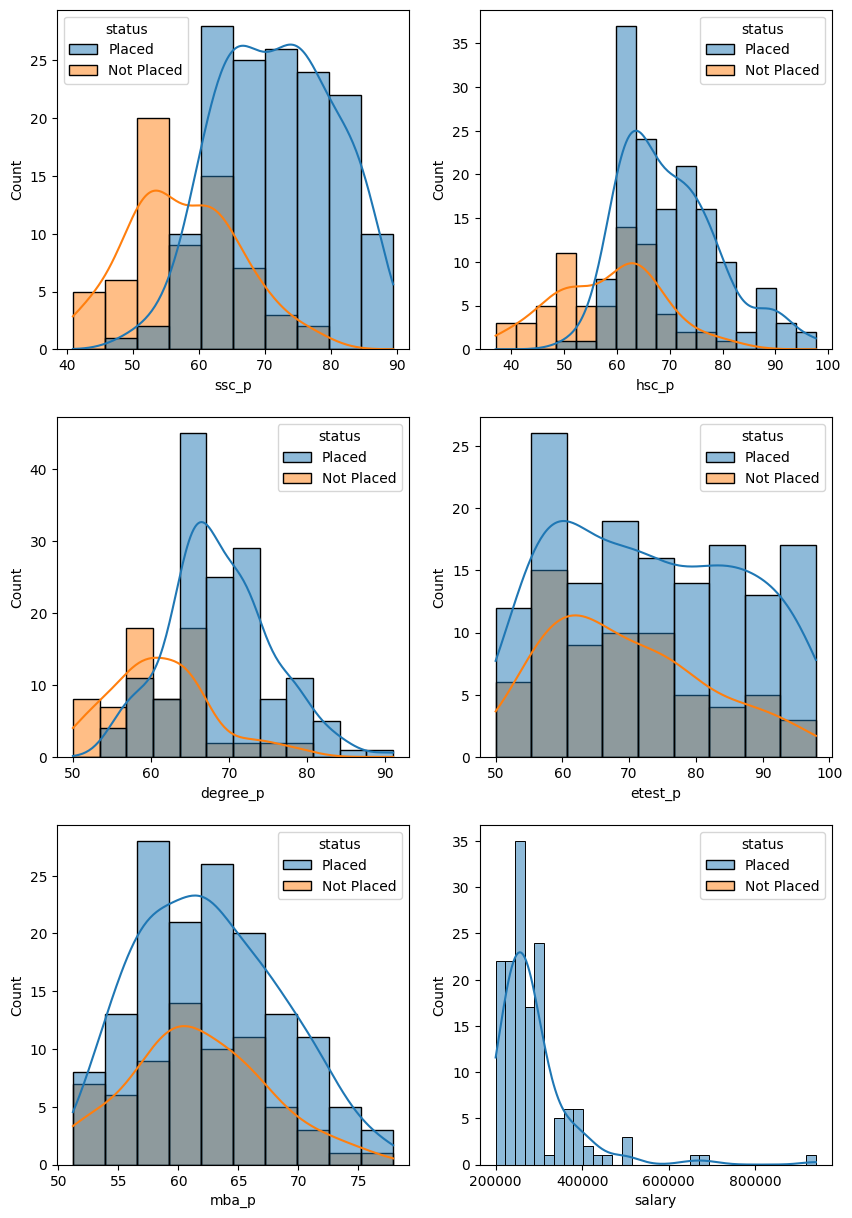

In [10]:
plt.figure(figsize = (10,15))
for i,col in enumerate(dataset.drop(['sl_no'], axis =1).select_dtypes('number').columns):
    plt.subplot(3,2,i+1)
    sns.histplot(x = col, hue = 'status', data = dataset, kde = True)
plt.show()

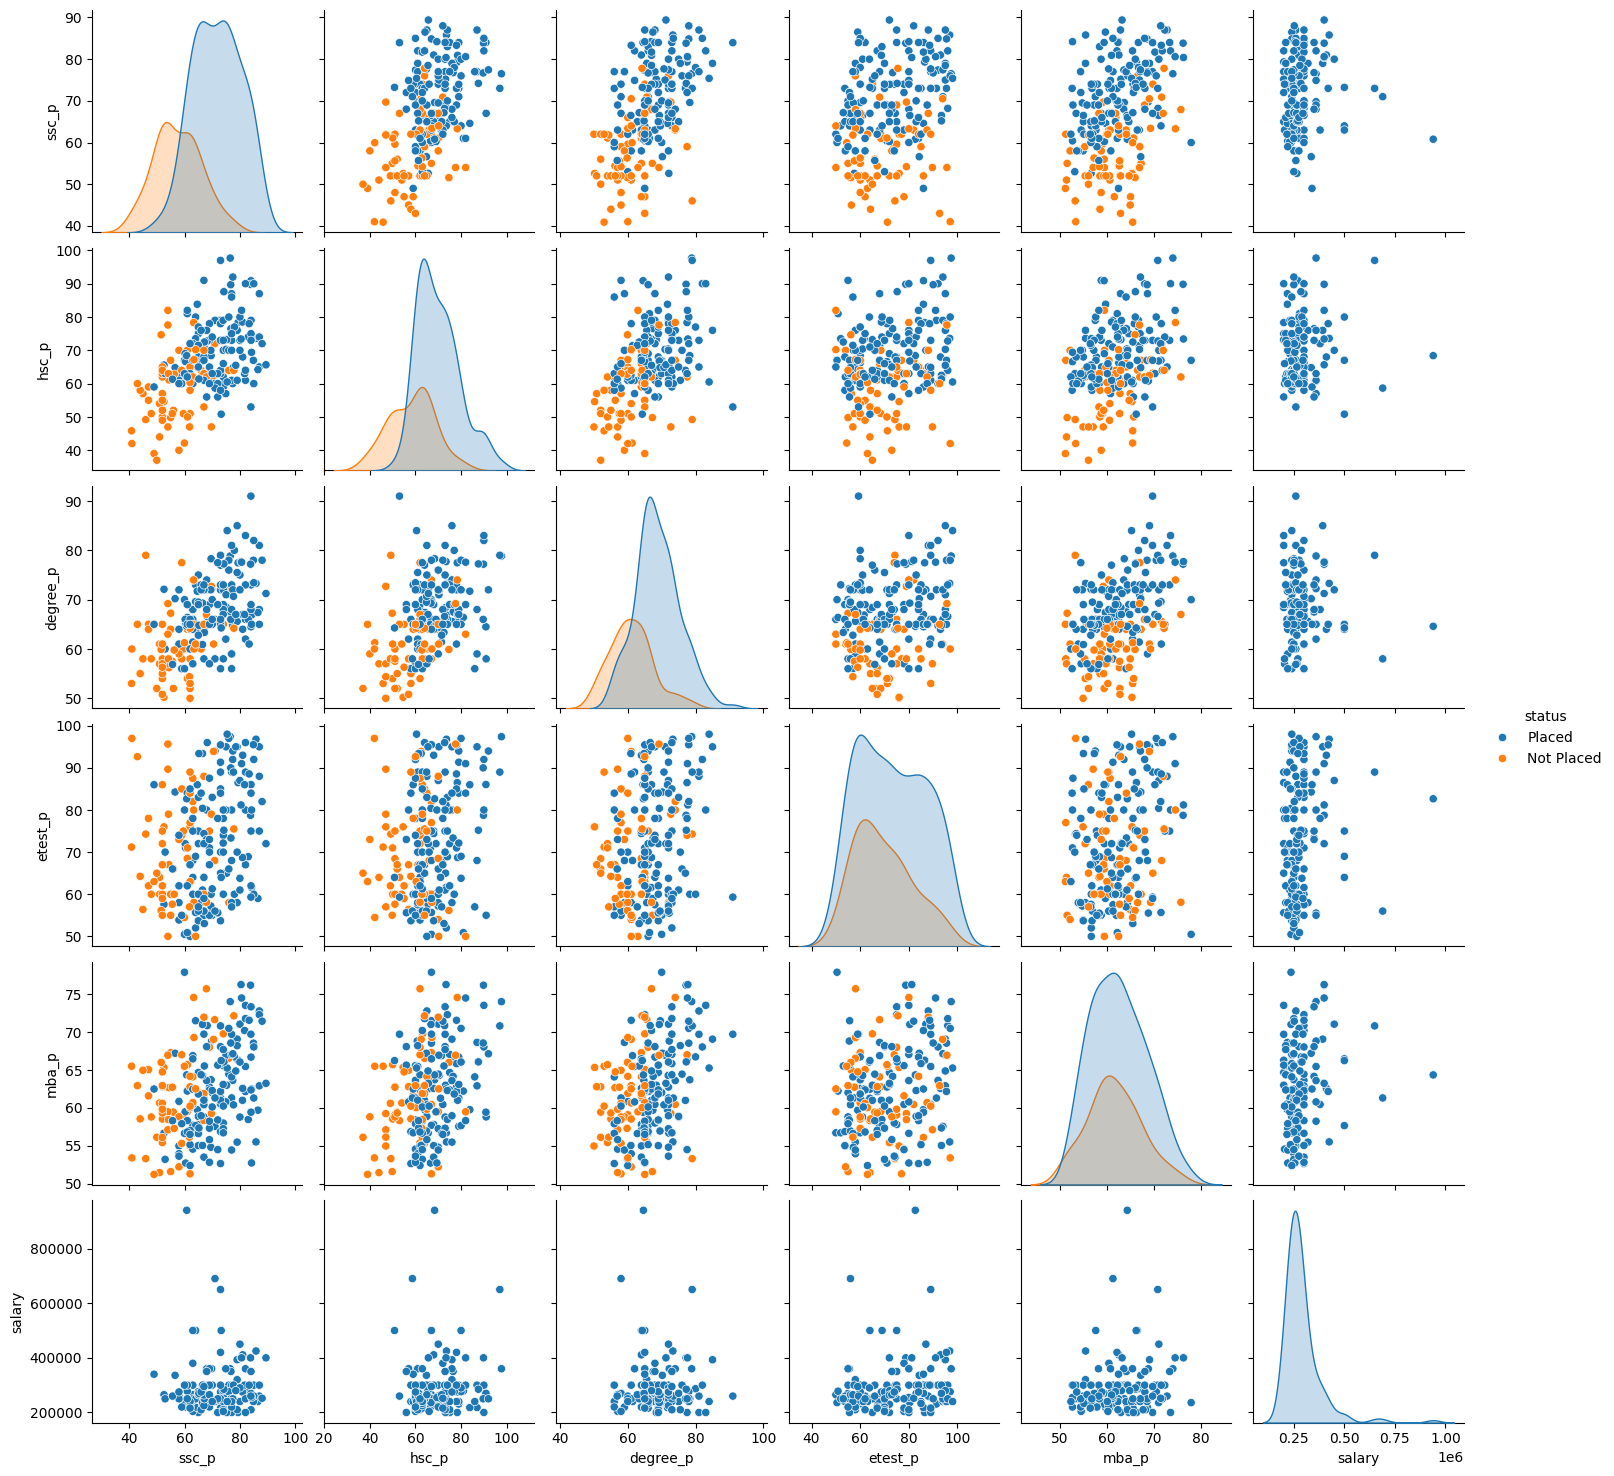

In [11]:
sns.pairplot(dataset.drop(['sl_no'], axis =1), hue = 'status')
plt.show()

In [12]:
#HeatMap

<Axes: >

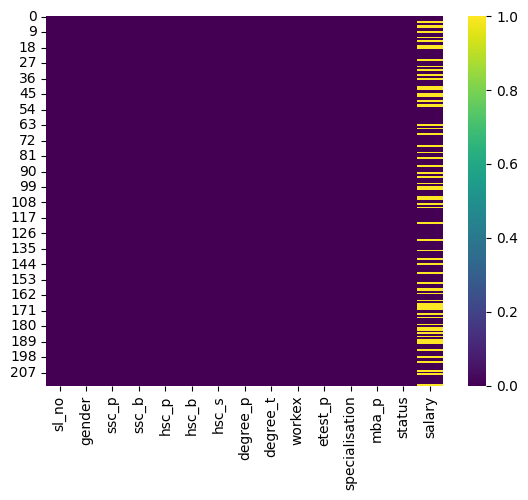

In [13]:
sns.heatmap(dataset.isnull(),cmap='viridis')

In [14]:
#Pairplot#

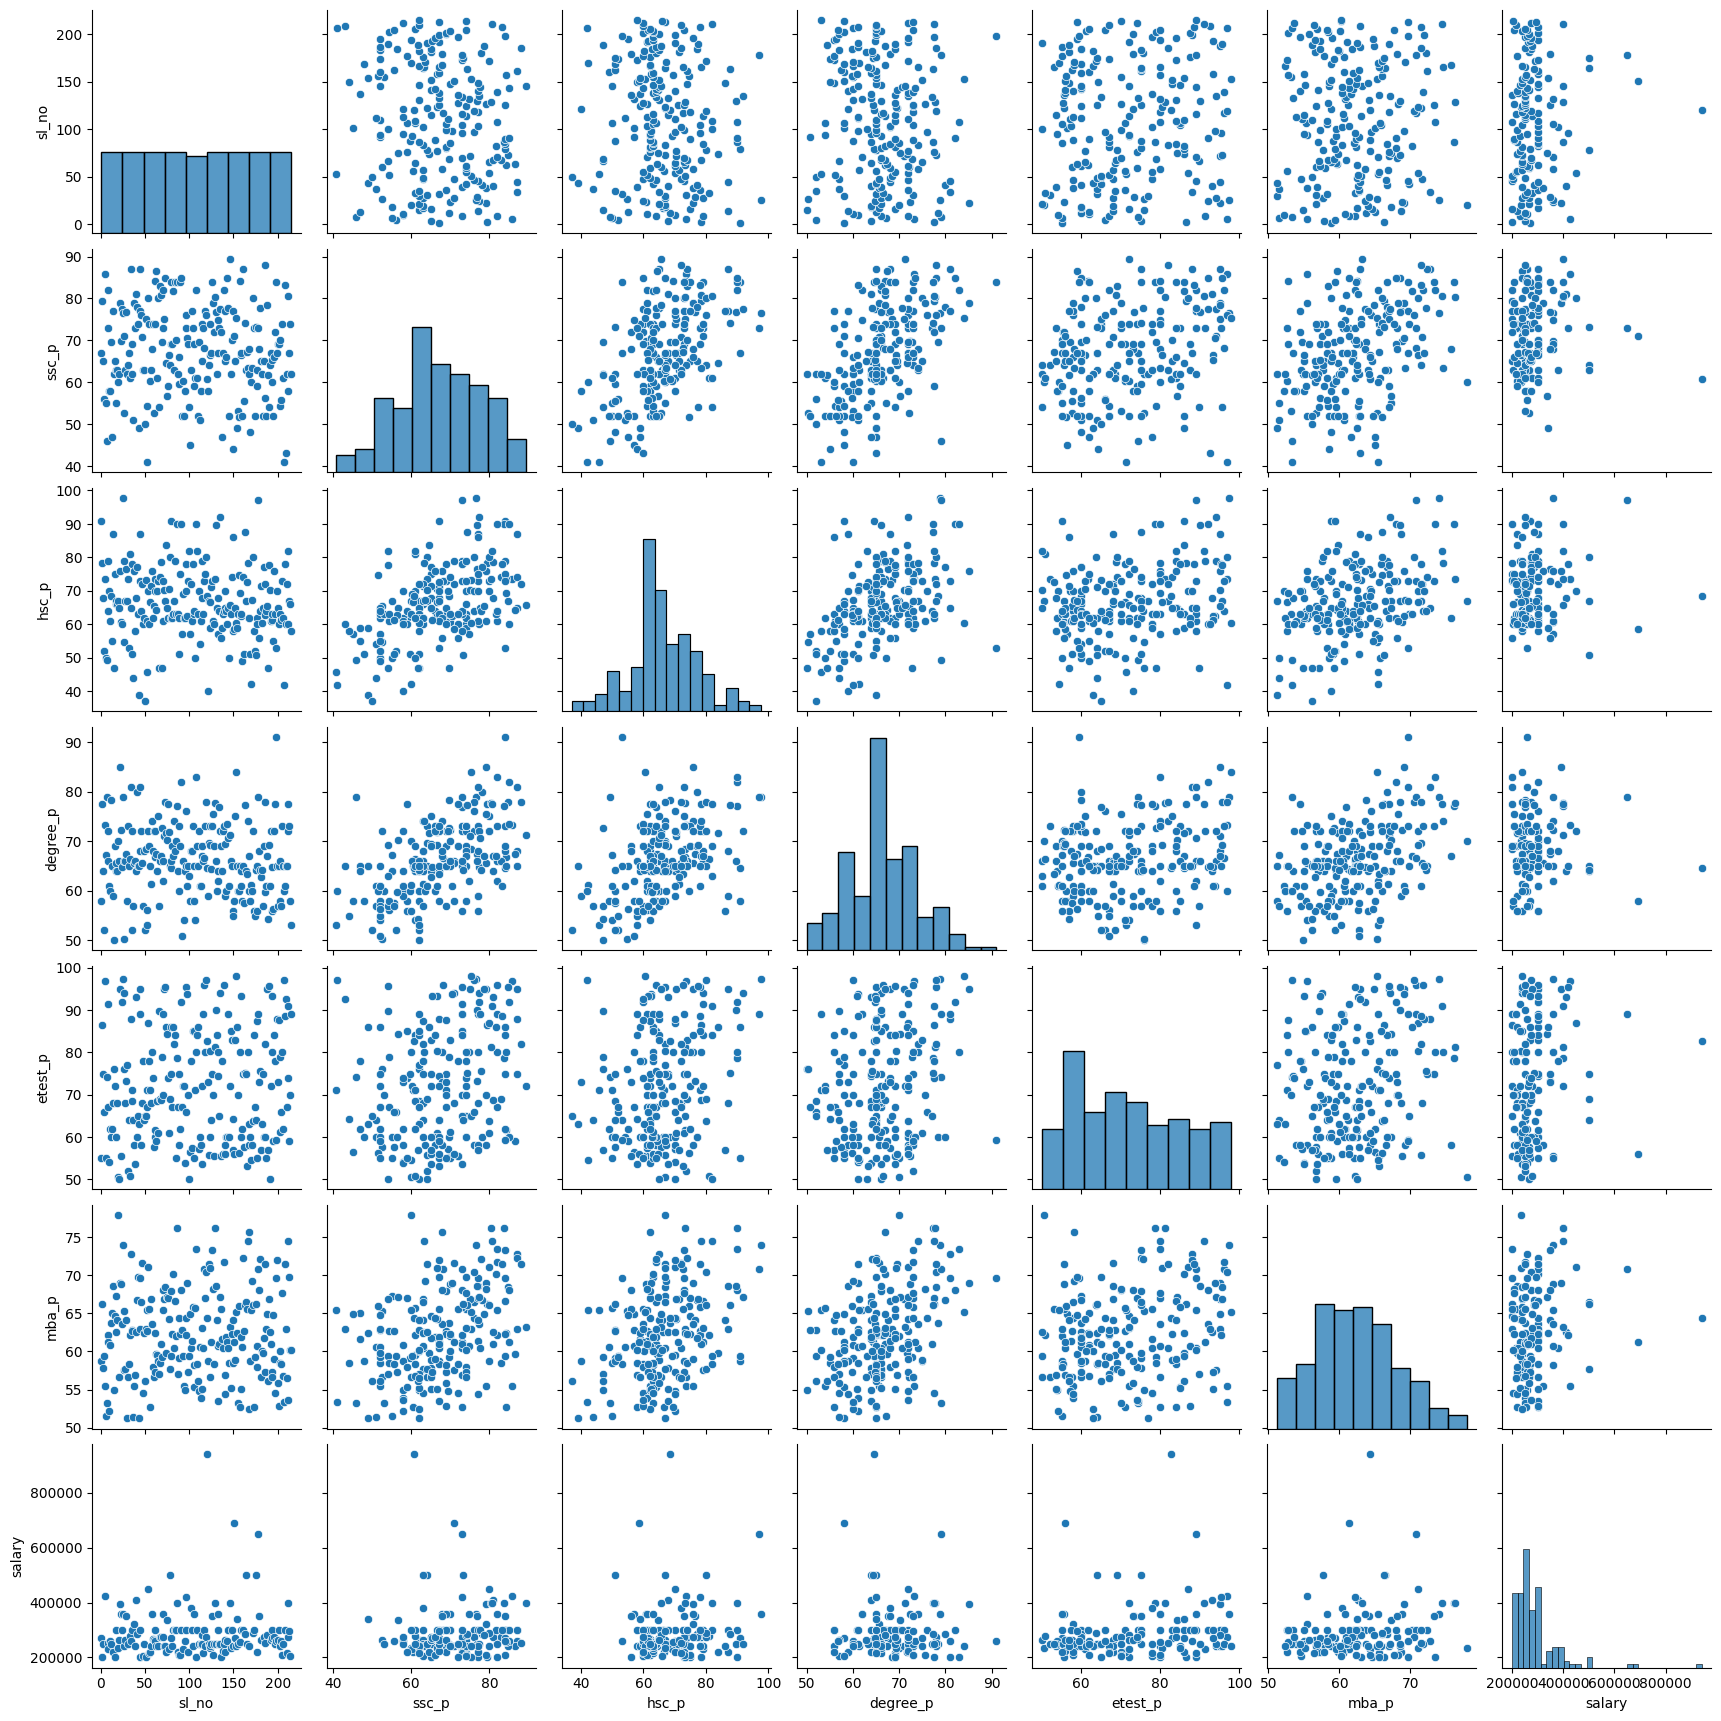

In [15]:
sns.pairplot(dataset)

<Axes: xlabel='status', ylabel='count'>

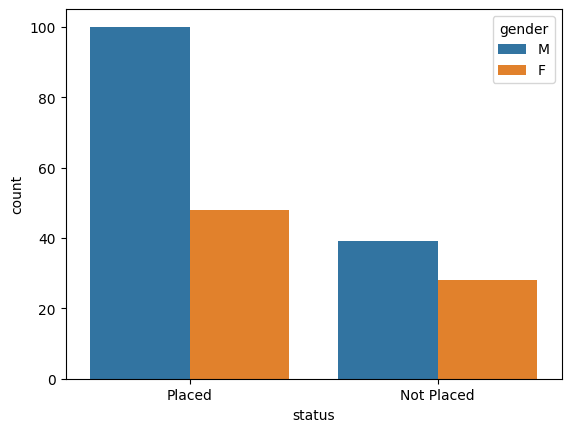

In [16]:
#To check number of placed students based on their gender through the histogram
sns.countplot(x='status',data=dataset,hue='gender')

<Axes: xlabel='status', ylabel='count'>

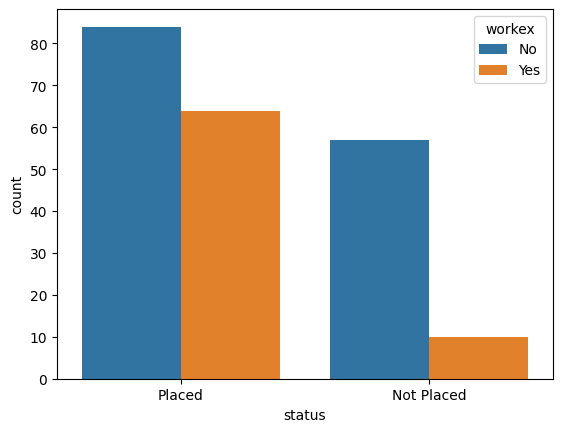

In [17]:
#To check the number of students placed or not based on their work experience through histogram
sns.countplot(x='status',data=dataset,hue='workex')

<Axes: xlabel='status', ylabel='count'>

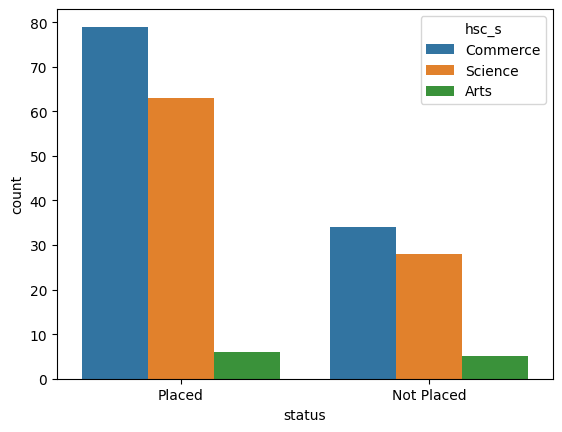

In [18]:
#To check the number of students placed or not based on their stream through Histogram
sns.countplot(x='status',data=dataset,hue='hsc_s')

<Axes: xlabel='status', ylabel='count'>

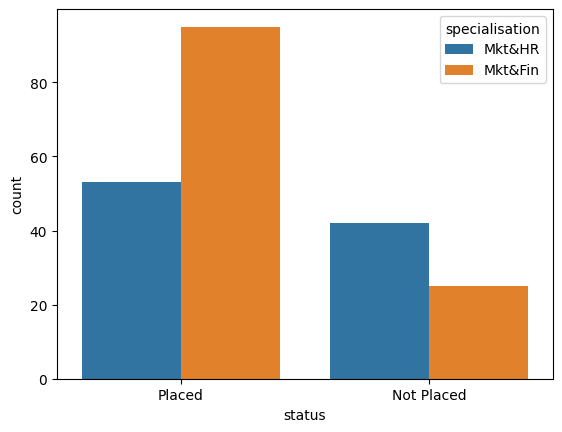

In [19]:
#To check the number of students placed or not based on their specialisation through Histogram
sns.countplot(x='status',data=dataset,hue='specialisation')

<Axes: ylabel='Frequency'>

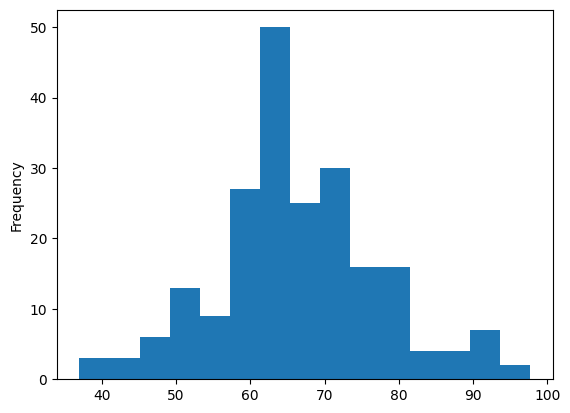

In [20]:
dataset['hsc_p'].plot.hist(bins=15)